In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv('./화학물질_배출량_정보.csv', sep='|')
df

,year_yy,sn_no,entrps_nm_cn,city_do_korean_cn,signgu_cn,locplc_cn,dscamt_num,dscamt_unit_cn,slfrclm_qy_num,slfrclm_qy_unit_cn,tranqy_num,tranqy_unit_cn,qotat_origin_rm
0,2001,1,(유)남해환경,전라남도,무안군,전라남도 무안군 삼향중앙로 140-51 (삼향읍),0,kg/yr,0,kg/yr,"43,896",kg/yr,화학물질종합정보시스템(ICIS)
1,2001,2,(유)랍 코리아,경기도,화성시,경기도 화성시 장안공단8길 42 (장안면),0,kg/yr,0,kg/yr,"10,497",kg/yr,화학물질종합정보시스템(ICIS)
2,2001,3,(유)보금,경상남도,양산시,경상남도 양산시 소주공단5길 3 (주남동),40,kg/yr,0,kg/yr,"13,803",kg/yr,화학물질종합정보시스템(ICIS)
3,2001,4,(유)삼송,경상남도,창원시 성산구,경상남도 창원시 성산구 정동로62번길 30 (성주동),"27,400",kg/yr,0,kg/yr,0,kg/yr,화학물질종합정보시스템(ICIS)
4,2001,5,(유)셀가드코리아,충청북도,청주시 청원구,충청북도 청주시 청원구 연구단지로 208 (오창읍),"82,929",kg/yr,0,kg/yr,21,kg/yr,화학물질종합정보시스템(ICIS)
5,2001,6,(유)스태츠칩팩코리아,인천광역시,중구,인천광역시 중구 자유무역로 191 (운서동),0,kg/yr,0,kg/yr,"163,227",kg/yr,화학물질종합정보시스템(ICIS)
6,2001,7,(유)아이티더브류특수필름,충청남도,천안시 서북구,"충청남도 천안시 서북구 성거길 112 (성거읍, (주)SKC)","35,270",kg/yr,0,kg/yr,"515,649",kg/yr,화학물질종합정보시스템(ICIS)
7,2001,8,(유)에스케이씨에보닉페록사이드코리아,울산광역시,남구,울산광역시 남구 상개로 99 (상개동),0,kg/yr,0,kg/yr,"1,138,200",kg/yr,화학물질종합정보시스템(ICIS)
8,2001,9,(유)원진알미늄,전라북도,완주군,전라북도 완주군 완주산단3로 166 (봉동읍),0,kg/yr,0,kg/yr,"1,176",kg/yr,화학물질종합정보시스템(ICIS)
9,2001,10,(유)피피지코리아,부산광역시,남구,부산광역시 남구 신선로356번길 21 (용당동),"8,033",kg/yr,0,kg/yr,"10,373",kg/yr,화학물질종합정보시스템(ICIS)


Text(0.0, 1.0, '매출단위 분포')

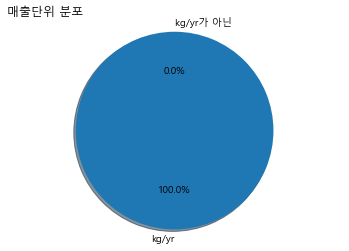

In [4]:
labels = 'kg/yr' , 'kg/yr가 아닌'
zero_count = len(df[df['dscamt_unit_cn']=='kg/yr'])
sizes = [zero_count,df.index[-1]+1-zero_count]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('매출단위 분포', loc='left')

Text(0.0, 1.0, '출처 분포')

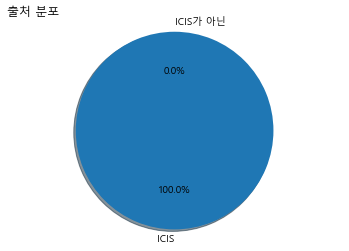

In [5]:
labels = 'ICIS' , 'ICIS가 아닌'
zero_count = len(df[df['qotat_origin_rm']=='화학물질종합정보시스템(ICIS)'])
sizes = [zero_count,df.index[-1]+1-zero_count]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('출처 분포', loc='left')

Text(0.0, 1.0, '자가매립량 단위 분포')

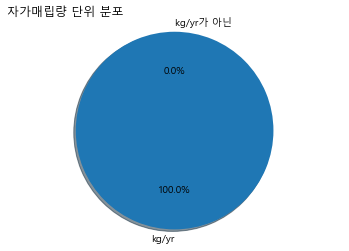

In [6]:
labels = 'kg/yr' , 'kg/yr가 아닌'
zero_count = len(df[df['slfrclm_qy_unit_cn']=='kg/yr'])
sizes = [zero_count,df.index[-1]+1-zero_count]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('자가매립량 단위 분포', loc='left')

Text(0.5, 0, '연도')

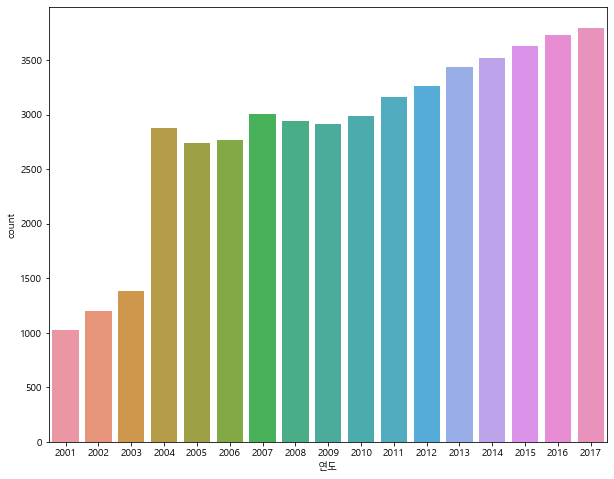

In [7]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,8))
sns.countplot(x="year_yy", data=df)
plt.xlabel('연도')

Text(0.5, 0, '시도국명')

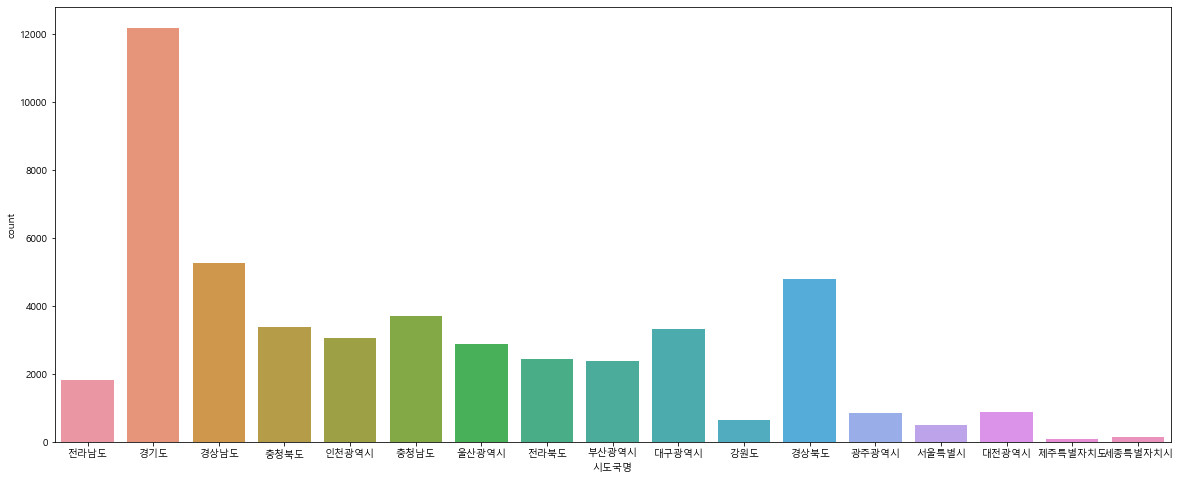

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(x="city_do_korean_cn", data=df)
plt.xlabel('시도국명')

In [9]:
df['entrps_nm_cn'].value_counts()

(주)경인양행                                47
(주)동진쎄미켐                               47
한국수출포장공업(주)                            39
(주)세아제강                                37
현대모비스(주)                               36
동우화인켐(주)                               36
인성산업(주)                                34
대경화학(주)                                34
송원산업(주)                                34
(주)유니드                                 33
(주)네패스                                 32
한일제관(주)                                32
(주)티에스씨                                32
(주)삼우                                  31
엘에스전선(주)                               30
(주)하이닉스반도체                             30
(주)대한솔루션                               30
(주)창성                                  30
(주)금비                                  29
부산경남우유협동조합                             29
희성금속(주)                                28
(주)연우                                  27
삼영전자공업(주)                              26
금강공업(주)                           

(-0.5, 399.5, 199.5, -0.5)

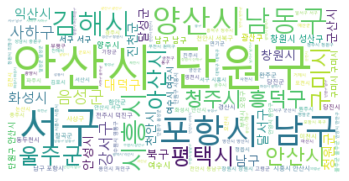

In [10]:
plt.rc('font', family='Malgun Gothic')


text = ' '.join(df['signgu_cn'].values.tolist())
# text
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

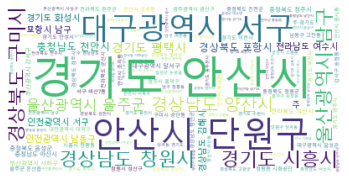

In [11]:
text = ' '.join(df['locplc_cn'].values.tolist())
# text
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [12]:
df['dscamt_num'] = df['dscamt_num'].apply(lambda x:int(x.replace(',','')))
df['slfrclm_qy_num'] = df['slfrclm_qy_num'].apply(lambda x:int(x.replace(',','')))
df['tranqy_num'] = df['tranqy_num'].apply(lambda x:int(x.replace(',','')))

C:\Users\pcn\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


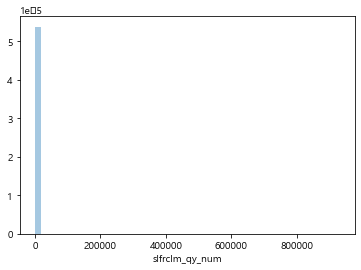

In [13]:
ax = sns.distplot(df['slfrclm_qy_num'])

C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


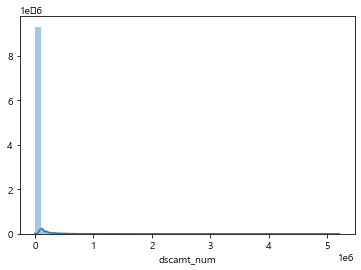

In [14]:
ax = sns.distplot(df['dscamt_num'])

In [15]:
df['dscamt_num'].describe()

count    4.839600e+04
mean     1.698319e+04
std      1.101840e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.530000e+02
75%      4.100000e+03
max      5.208961e+06
Name: dscamt_num, dtype: float64

C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pcn\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


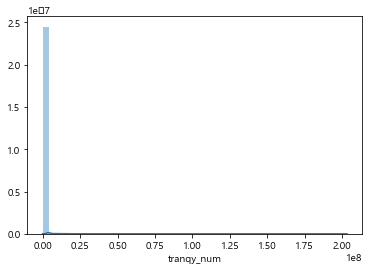

In [16]:
ax = sns.distplot(df['tranqy_num'])


Text(0.0, 1.0, '자가매립량')

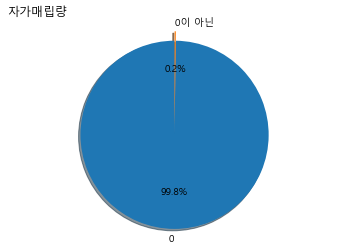

In [17]:
labels = '0' , '0이 아닌'
zero_count = len(df[df['slfrclm_qy_num']==0])
sizes = [zero_count,df.index[-1]+1-zero_count]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
ax1.set_title('자가매립량', loc='left')

Text(0.0, 1.0, '배출량')

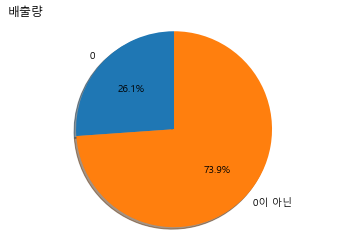

In [18]:
labels = '0' , '0이 아닌'
zero_count = len(df[df['dscamt_num']==0])
sizes = [zero_count,df.index[-1]+1-zero_count]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('배출량', loc='left')

Text(0.0, 1.0, '이동량')

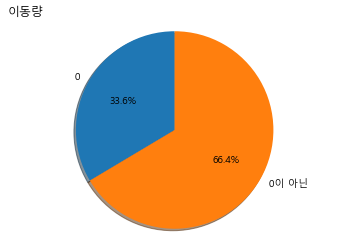

In [19]:
labels = '0' , '0이 아닌'
zero_count = len(df[df['tranqy_num']==0])
sizes = [zero_count,df.index[-1]+1-zero_count]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('이동량', loc='left')

Text(0.5, 1.0, '연도 별 자가매립 횟수')

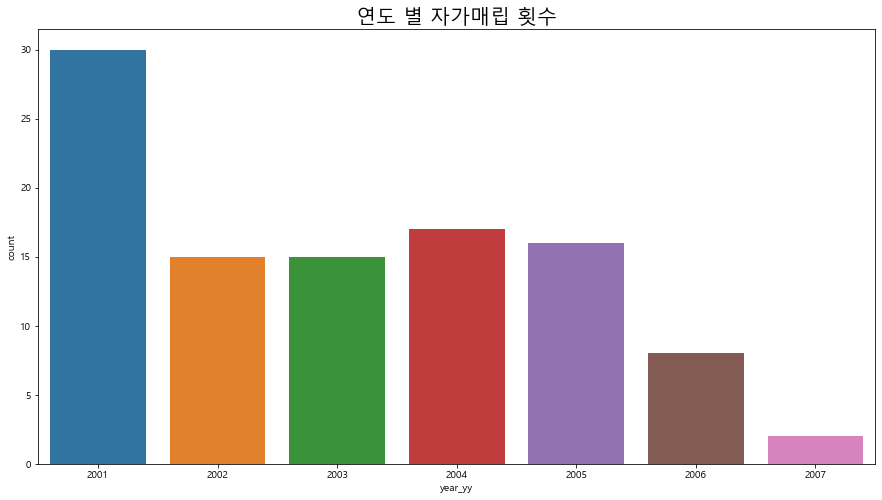

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x="year_yy", data=df[df['slfrclm_qy_num']!=0])
plt.title('연도 별 자가매립 횟수', fontsize=20)

In [21]:
mean_df = df.groupby(['year_yy']).mean()
mean_df

,sn_no,dscamt_num,slfrclm_qy_num,tranqy_num
year_yy,,,,
2001,511.5,35680.973581,1600.982387,245351.115460
2002,599.0,28123.738513,1.431913,235841.816207
2003,692.0,27193.825018,4.968908,234051.356471
2004,1439.5,17634.323141,0.105629,112368.360667
2005,1371.0,17275.447282,0.097045,121397.776359
2006,1385.0,17296.218129,0.013001,119088.666667
2007,1505.0,15846.331007,0.006979,122489.558990
2008,1473.0,16169.045501,0.000000,143287.198642
2009,1459.0,16130.321563,0.000000,180588.971203


Text(0.5, 1.0, '연도 별 평균 배출량')

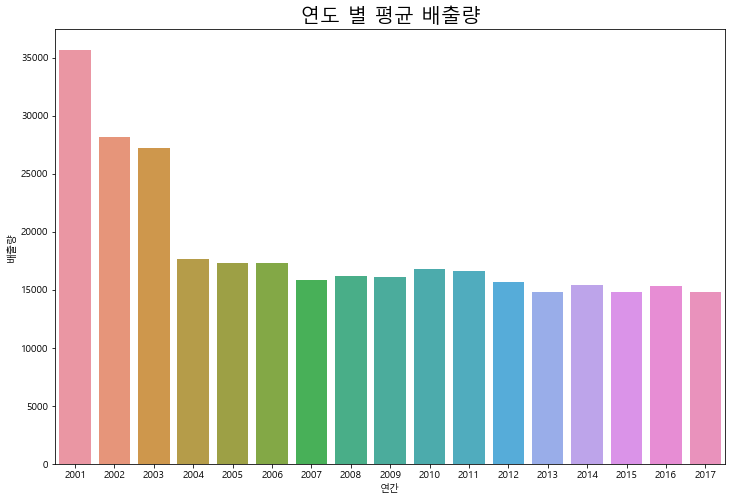

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='dscamt_num', data=mean_df)
plt.xlabel('연간')
plt.ylabel('배출량')
plt.title('연도 별 평균 배출량', fontsize=20)

Text(0.5, 1.0, '연도 별 평균 이동량')

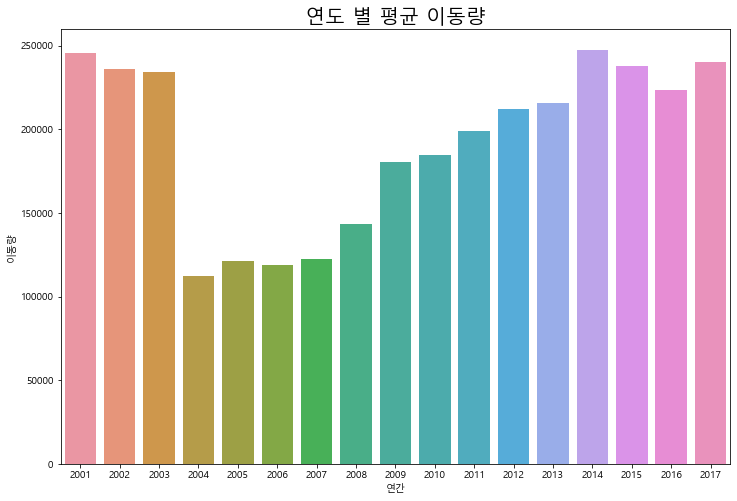

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='tranqy_num', data=mean_df)
plt.xlabel('연간')
plt.ylabel('이동량')
plt.title('연도 별 평균 이동량', fontsize=20)

Text(0.5, 1.0, '연도 별 평균 자가매립량')

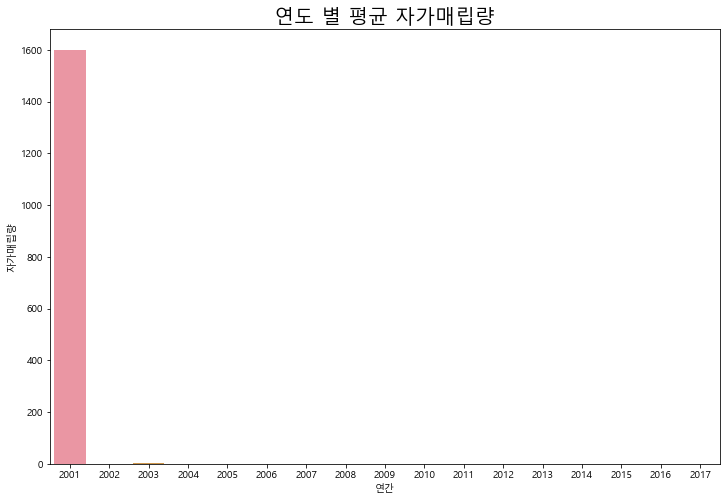

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x=mean_df.index, y='slfrclm_qy_num', data=mean_df)
plt.xlabel('연간')
plt.ylabel('자가매립량')
plt.title('연도 별 평균 자가매립량', fontsize=20)

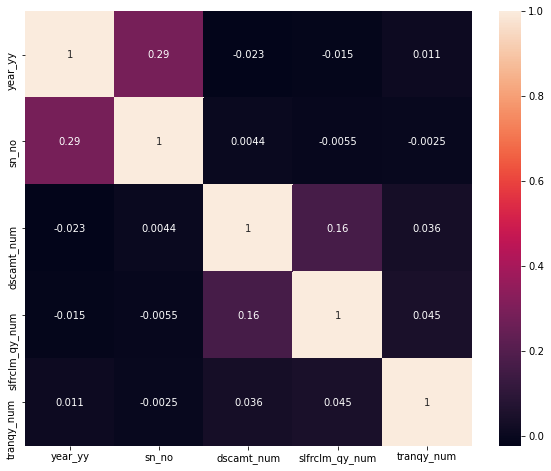

In [25]:
plt.figure(figsize=(10,8))
plt.rc('font', family='sans-serif')
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, '배출량 - 자가매립량')

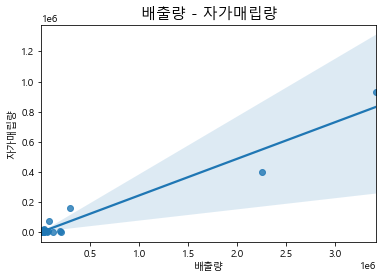

In [26]:
plt.rc('font', family='Malgun Gothic')
sns.regplot(x='dscamt_num',y='slfrclm_qy_num',data=df[df['slfrclm_qy_num']!=0])
plt.xlabel('배출량')
plt.ylabel('자가매립량')
plt.title('배출량 - 자가매립량', fontsize=15)

Text(0.5, 1.0, '배출량 - 이동량')

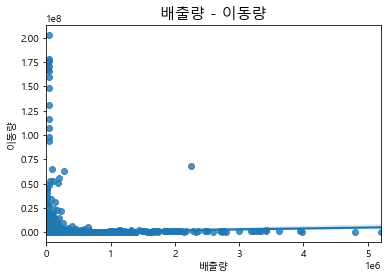

In [27]:
sns.regplot(x='dscamt_num',y='tranqy_num',data=df)
plt.xlabel('배출량')
plt.ylabel('이동량')
plt.title('배출량 - 이동량', fontsize=15)

Text(0.5, 1.0, '자가매립량 - 이동량')

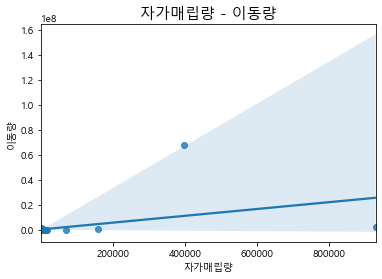

In [28]:
sns.regplot(x='slfrclm_qy_num',y='tranqy_num',data=df[df['slfrclm_qy_num']!=0])
plt.xlabel('자가매립량')
plt.ylabel('이동량')
plt.title('자가매립량 - 이동량', fontsize=15)

In [29]:
mean_df = df.groupby(['city_do_korean_cn']).mean()
mean_df

,year_yy,sn_no,dscamt_num,slfrclm_qy_num,tranqy_num
city_do_korean_cn,,,,,
강원도,2010.749606,1732.332283,14281.085039,0.000000,526315.074016
경기도,2010.270705,1519.280965,12037.422556,2.153000,137977.296479
경상남도,2010.176381,1577.113917,25738.347446,1.951775,72348.783748
경상북도,2010.271721,1496.362155,11375.782790,197.274436,490770.927318
광주광역시,2010.371293,1517.340451,16606.279953,4.791222,62615.326216
대구광역시,2009.322319,1426.540403,14257.515470,0.000000,193649.631120
대전광역시,2009.986425,1595.730769,4243.444570,0.002262,98899.015837
부산광역시,2010.031933,1387.273950,13480.080252,32.005042,108304.302941
서울특별시,2009.088115,1534.872951,9042.852459,17.125000,49778.233607


In [30]:
df['entrps_nm_cn'].value_counts()

(주)경인양행                                47
(주)동진쎄미켐                               47
한국수출포장공업(주)                            39
(주)세아제강                                37
현대모비스(주)                               36
동우화인켐(주)                               36
인성산업(주)                                34
대경화학(주)                                34
송원산업(주)                                34
(주)유니드                                 33
(주)네패스                                 32
한일제관(주)                                32
(주)티에스씨                                32
(주)삼우                                  31
엘에스전선(주)                               30
(주)하이닉스반도체                             30
(주)대한솔루션                               30
(주)창성                                  30
(주)금비                                  29
부산경남우유협동조합                             29
희성금속(주)                                28
(주)연우                                  27
삼영전자공업(주)                              26
금강공업(주)                           

In [31]:
df

,year_yy,sn_no,entrps_nm_cn,city_do_korean_cn,signgu_cn,locplc_cn,dscamt_num,dscamt_unit_cn,slfrclm_qy_num,slfrclm_qy_unit_cn,tranqy_num,tranqy_unit_cn,qotat_origin_rm
0,2001,1,(유)남해환경,전라남도,무안군,전라남도 무안군 삼향중앙로 140-51 (삼향읍),0,kg/yr,0,kg/yr,43896,kg/yr,화학물질종합정보시스템(ICIS)
1,2001,2,(유)랍 코리아,경기도,화성시,경기도 화성시 장안공단8길 42 (장안면),0,kg/yr,0,kg/yr,10497,kg/yr,화학물질종합정보시스템(ICIS)
2,2001,3,(유)보금,경상남도,양산시,경상남도 양산시 소주공단5길 3 (주남동),40,kg/yr,0,kg/yr,13803,kg/yr,화학물질종합정보시스템(ICIS)
3,2001,4,(유)삼송,경상남도,창원시 성산구,경상남도 창원시 성산구 정동로62번길 30 (성주동),27400,kg/yr,0,kg/yr,0,kg/yr,화학물질종합정보시스템(ICIS)
4,2001,5,(유)셀가드코리아,충청북도,청주시 청원구,충청북도 청주시 청원구 연구단지로 208 (오창읍),82929,kg/yr,0,kg/yr,21,kg/yr,화학물질종합정보시스템(ICIS)
5,2001,6,(유)스태츠칩팩코리아,인천광역시,중구,인천광역시 중구 자유무역로 191 (운서동),0,kg/yr,0,kg/yr,163227,kg/yr,화학물질종합정보시스템(ICIS)
6,2001,7,(유)아이티더브류특수필름,충청남도,천안시 서북구,"충청남도 천안시 서북구 성거길 112 (성거읍, (주)SKC)",35270,kg/yr,0,kg/yr,515649,kg/yr,화학물질종합정보시스템(ICIS)
7,2001,8,(유)에스케이씨에보닉페록사이드코리아,울산광역시,남구,울산광역시 남구 상개로 99 (상개동),0,kg/yr,0,kg/yr,1138200,kg/yr,화학물질종합정보시스템(ICIS)
8,2001,9,(유)원진알미늄,전라북도,완주군,전라북도 완주군 완주산단3로 166 (봉동읍),0,kg/yr,0,kg/yr,1176,kg/yr,화학물질종합정보시스템(ICIS)
9,2001,10,(유)피피지코리아,부산광역시,남구,부산광역시 남구 신선로356번길 21 (용당동),8033,kg/yr,0,kg/yr,10373,kg/yr,화학물질종합정보시스템(ICIS)


In [32]:
temp = df[(df['entrps_nm_cn']=='(주)경인양행')&(df['locplc_cn']=='경기도 안산시 원시동 785-7')]

Text(0.5, 1.0, '(주)경인양행')

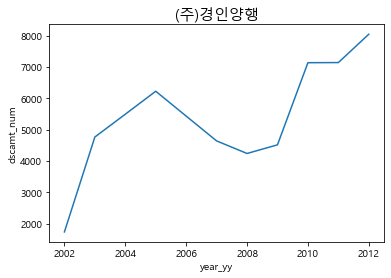

In [33]:
sns.lineplot(data=temp,x='year_yy',y='dscamt_num')
plt.title('(주)경인양행', fontsize=15)

Text(0.5, 1.0, '(주)동진쎄미켐')

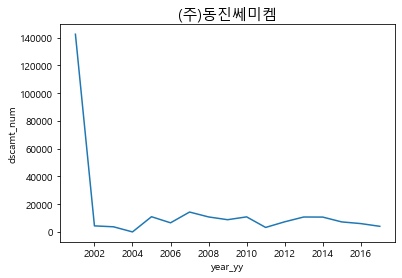

In [34]:
temp2 = df[(df['entrps_nm_cn']=='(주)동진쎄미켐')&(df['signgu_cn']=='서구')]
# 경기도 오산시 누읍동 80-1
sns.lineplot(data=temp2,x='year_yy',y='dscamt_num')
plt.title('(주)동진쎄미켐', fontsize=15)